## Data Preprocessing and Generalized Linear Model (GLM)/Logistic Regression

### Missing Value, Outlied, Mean, Standard Deviation

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

kidney_data = pd.read_excel('MDS_Assignment1_kidney.xlsx',header=None)
kidney_data.columns=["age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad","appet","pe","ane","class"]
kidney_data=kidney_data.replace("?",np.nan)

kidney_data['sg'] = kidney_data['sg'].astype('category',copy=False)
kidney_data['al'] = kidney_data['al'].astype('category',copy=False)
kidney_data['su'] = kidney_data['su'].astype('category',copy=False)

print("# of missing value\n",kidney_data.isna().sum(),"\n") #count the number of missing value

numeric_kidney_data = kidney_data.select_dtypes(include=[np.number])
zscore=abs(numeric_kidney_data[:]-numeric_kidney_data[:].mean())/numeric_kidney_data[:].std(ddof=1) #obtain z-score to get outlizer(z-score>3 or <-3)
print("# of outlier\n",zscore[zscore[1:] > 3].count(),"\n") #count the number of outlier

print("mean and std\n",kidney_data.describe(include='all')) #obtain mean,std(square root of variance)

# of missing value
 age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       72
wc       109
rc       134
htn        8
dm        13
cad       15
appet     14
pe        14
ane       14
class     13
dtype: int64 

# of outlier
 age      0
bp       3
bgr     10
bu       9
sc       4
sod      2
pot      2
hemo     1
pcv      1
wc       4
rc       0
dtype: int64 

mean and std
                age          bp      sg     al     su     rbc      pc  \
count   391.000000  388.000000  353.00  354.0  351.0     248     335   
unique         NaN         NaN    5.00    6.0    6.0       2       2   
top            NaN         NaN    1.02    0.0    0.0  normal  normal   
freq           NaN         NaN  106.00  199.0  290.0     201     259   
mean     51.483376   76.469072     NaN    NaN    NaN     NaN     NaN   
std      17.169714   13.683637     NaN    Na

### Data Distribution

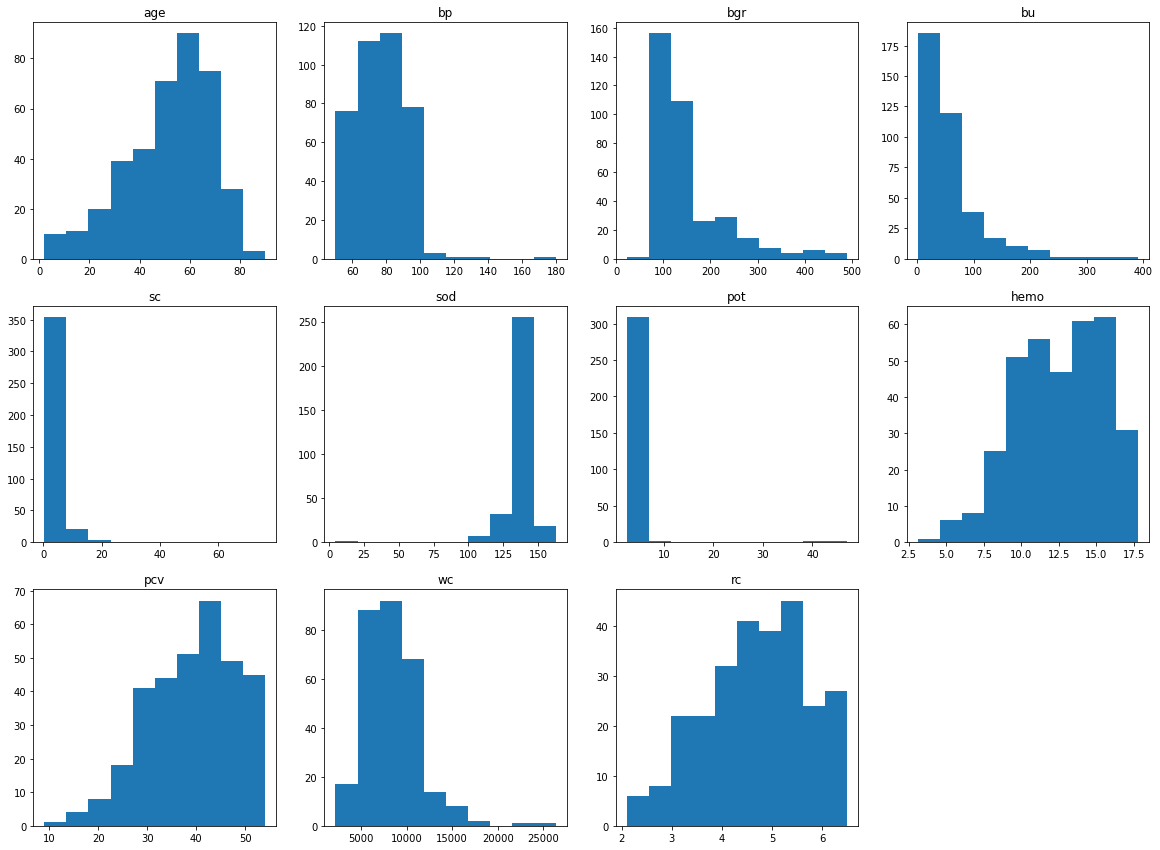

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(kidney_data['age'])
plt.title("age")

plt.subplot(4,4,2)
plt.hist(kidney_data['bp'])
plt.title("bp")

plt.subplot(4,4,3)
plt.hist(kidney_data['bgr'])
plt.title("bgr")

plt.subplot(4,4,4)
plt.hist(kidney_data['bu'])
plt.title("bu")

plt.subplot(4,4,5)
plt.hist(kidney_data['sc'])
plt.title("sc")

plt.subplot(4,4,6)
plt.hist(kidney_data['sod'])
plt.title("sod")

plt.subplot(4,4,7)
plt.hist(kidney_data['pot'])
plt.title("pot")

plt.subplot(4,4,8)
plt.hist(kidney_data['hemo'])
plt.title("hemo")

plt.subplot(4,4,9)
plt.hist(kidney_data['pcv'])
plt.title("pcv")

plt.subplot(4,4,10)
plt.hist(kidney_data['wc'])
plt.title("wc")

plt.subplot(4,4,11)
plt.hist(kidney_data['rc'])
plt.title("rc")

plt.show()

### Remove the observation without "class" value

In [3]:
rm_kidney_data=kidney_data.dropna(axis=0,subset=['class'])
rm_kidney_data.head(50)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


### Imputing

In [4]:
#the python package "KNNImputer" cannot impute the missing values directly
#so it is needed to label encode categorical varibales before imputing
from sklearn.preprocessing import LabelEncoder
lab_encoder=LabelEncoder()

categorical_col=kidney_data.select_dtypes(include=[np.object]).columns

rm_kidney_data_N=rm_kidney_data[categorical_col].fillna("N")
rm_kidney_data_N

for col in categorical_col:
    index=rm_kidney_data[col].isna()
    rm_kidney_data[col]=lab_encoder.fit_transform(rm_kidney_data_N[col])
    for i in rm_kidney_data.index:
        if(index[i]):
            rm_kidney_data[col][i]=np.nan

rm_kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,2.0,1.0,1.0,121.0,...,44.0,7800.0,5.2,2.0,3.0,1.0,1.0,1.0,1.0,0
1,7.0,50.0,1.020,4.0,0.0,NaN,2.0,1.0,1.0,NaN,...,38.0,6000.0,NaN,1.0,2.0,1.0,1.0,1.0,1.0,0
2,62.0,80.0,1.010,2.0,3.0,2.0,2.0,1.0,1.0,423.0,...,31.0,7500.0,NaN,1.0,3.0,1.0,2.0,1.0,2.0,0
3,48.0,70.0,1.005,4.0,0.0,2.0,1.0,2.0,1.0,117.0,...,32.0,6700.0,3.9,2.0,2.0,1.0,2.0,2.0,2.0,0
4,51.0,80.0,1.010,2.0,0.0,2.0,2.0,1.0,1.0,106.0,...,35.0,7300.0,4.6,1.0,2.0,1.0,1.0,1.0,1.0,0


In [5]:
#make sure the categorical variables are "category" type
rm_kidney_data['sg'] = rm_kidney_data['sg'].astype('category',copy=False)
rm_kidney_data['al'] = rm_kidney_data['al'].astype('category',copy=False)
rm_kidney_data['su'] = rm_kidney_data['su'].astype('category',copy=False)
for col in categorical_col:
    rm_kidney_data[col]=rm_kidney_data[col].astype('category',copy=False)

#impute the missing value by KNN method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(rm_kidney_data)
knn_rm_kidney_data = imputer.transform(rm_kidney_data)

from pandas import DataFrame
knn_rm_kidney_data=DataFrame(knn_rm_kidney_data,columns=["age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad","appet","pe","ane","class"])
knn_rm_kidney_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.8,2.0,1.0,1.0,121.0,...,44.0,7800.0,5.20,2.0,3.0,1.0,1.0,1.0,1.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.6,2.0,1.0,1.0,123.8,...,38.0,6000.0,4.96,1.0,2.0,1.0,1.0,1.0,1.0,0.0
2,62.0,80.0,1.010,2.0,3.0,2.0,2.0,1.0,1.0,423.0,...,31.0,7500.0,3.80,1.0,3.0,1.0,2.0,1.0,2.0,0.0
3,48.0,70.0,1.005,4.0,0.0,2.0,1.0,2.0,1.0,117.0,...,32.0,6700.0,3.90,2.0,2.0,1.0,2.0,2.0,2.0,0.0
4,51.0,80.0,1.010,2.0,0.0,2.0,2.0,1.0,1.0,106.0,...,35.0,7300.0,4.60,1.0,2.0,1.0,1.0,1.0,1.0,0.0


In [6]:
#make sure the categorical variables are "category" type
knn_rm_kidney_data['sg'] = rm_kidney_data['sg'].astype('category',copy=False)
knn_rm_kidney_data['al'] = rm_kidney_data['al'].astype('category',copy=False)
knn_rm_kidney_data['su'] = rm_kidney_data['su'].astype('category',copy=False)
for col in categorical_col:
    knn_rm_kidney_data[col]=knn_rm_kidney_data[col].astype('category',copy=False)

#transform the categorical variable to dummy variable
dum_knn_rm_kidney_data = pd.get_dummies(knn_rm_kidney_data,drop_first=True)
dum_knn_rm_kidney_data.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,...,dm_2.4,dm_3.0,cad_1.2,cad_2.0,appet_1.2,appet_2.0,pe_1.2,pe_2.0,ane_2.0,class_1.0
0,48.0,80.0,121.0,36.0,1.2,137.6,4.20,15.4,44.0,7800.0,...,0,1,0,0,0,0,0,0,0,0
1,7.0,50.0,123.8,18.0,0.8,137.4,3.88,11.3,38.0,6000.0,...,0,0,0,0,0,0,0,0,0,0
2,62.0,80.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,...,0,1,0,0,0,1,0,0,1,0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,...,0,0,0,0,0,1,0,1,1,0
4,51.0,80.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [7]:
# split the dataset into training and testing sets
import sklearn.model_selection as model_selection

X=dum_knn_rm_kidney_data.drop(['class_1.0'],axis=1)
y=dum_knn_rm_kidney_data['class_1.0']
X_train,X_test,y_train,y_test=model_selection.train_test_split(X, y, test_size=0.2)

In [8]:
#Predict the "Class" by LogisticRegression()
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

reg=LogisticRegression()
reg.fit(X_train, y_train)

y_pred=reg.predict(X_test)

score=reg.score(X_test, y_test)
print("accuracy: ",score)

confusion_matrix=confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",confusion_matrix)

accuracy:  0.9358974358974359
confusion matrix: 
 [[47  3]
 [ 2 26]]
